In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [284]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [285]:
df.shape

(13320, 9)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [287]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [288]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [289]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [290]:
df.dtypes[df.dtypes != 'object']

bath       float64
balcony    float64
price      float64
dtype: object

In [291]:
df.dtypes[df.dtypes == 'object']

area_type       object
availability    object
location        object
size            object
society         object
total_sqft      object
dtype: object

In [292]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [293]:
df['size'] = df['size'].fillna('2 BHK')

In [294]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [295]:
df['bath'] = df['bath'].fillna(df['bath'].median())
df['location'] = df['location'].fillna('Sarjapur  Road')

In [296]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony          609
price              0
dtype: int64

In [297]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [298]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [299]:
df.drop(columns=['size'], inplace=True)

In [300]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [301]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


In [302]:
df.drop(columns=['availability', 'society'], inplace=True)

In [303]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [304]:
numeric_values = pd.to_numeric(df['total_sqft'], errors='coerce')
non_numeric_values = df['total_sqft'][numeric_values.isna()].tolist()

In [305]:
def convertRange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convertRange)
df.dropna(inplace=True)
df['Price_per_square_feet'] = df['price']*100000 / df['total_sqft']

In [306]:
location_count = df['location'].value_counts()
location_count_less_10 = location_count[location_count<10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
df = df[((df['total_sqft']/df['bhk'])>=300)]

In [307]:
df

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


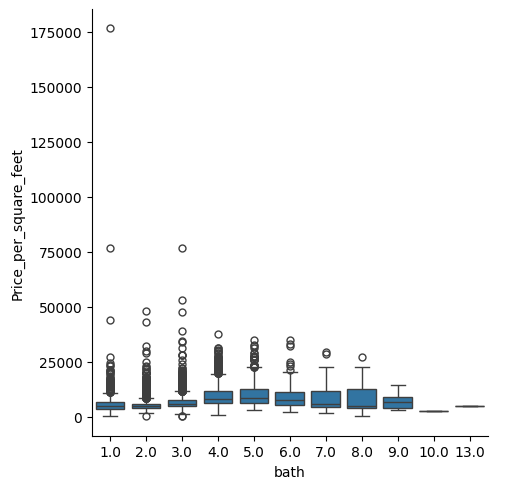

In [308]:
sns.catplot(data=df, x="bath", y="Price_per_square_feet", kind="box")

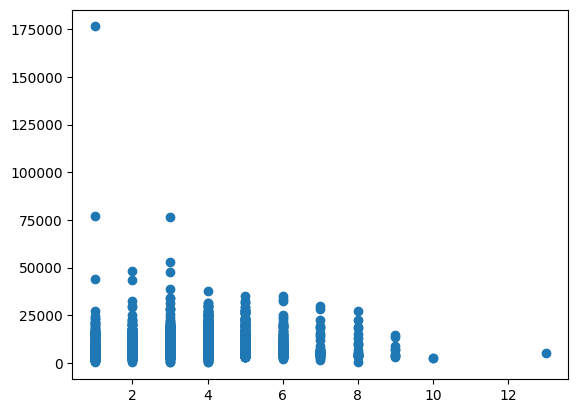

In [309]:
plt.scatter(x='bath', y='Price_per_square_feet', data=df)

In [310]:
df.query('bath > 12')
#9935 drop

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
9935,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [311]:
df.query('Price_per_square_feet > 150000')

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
7657,Built-up Area,other,425.0,1.0,1.0,750.0,1,176470.588235


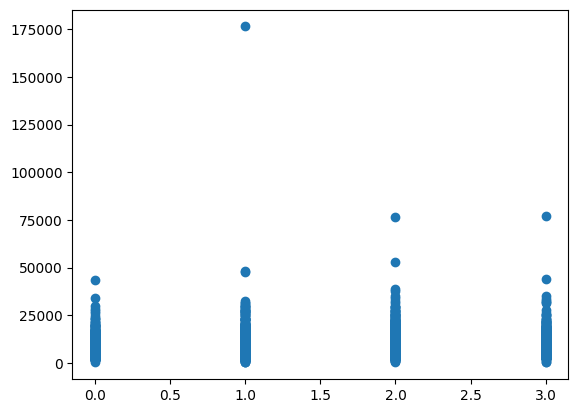

In [312]:
plt.scatter(x='balcony', y='Price_per_square_feet', data=df)

In [313]:
df.query('Price_per_square_feet > 150000')
#7657 drop

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
7657,Built-up Area,other,425.0,1.0,1.0,750.0,1,176470.588235


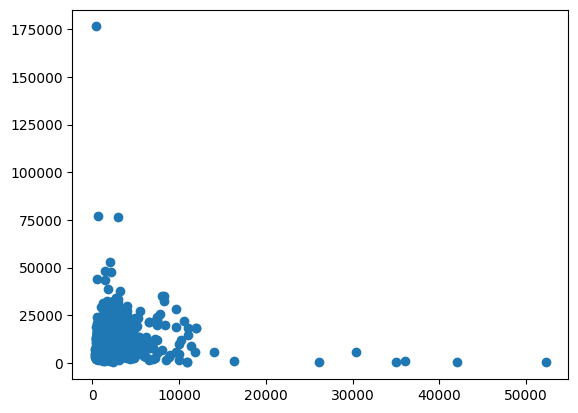

In [314]:
plt.scatter(x='total_sqft', y='Price_per_square_feet', data=df)

In [315]:
df.query('Price_per_square_feet > 150000')

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
7657,Built-up Area,other,425.0,1.0,1.0,750.0,1,176470.588235


In [316]:
df.query('total_sqft > 30000')

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
674,Built-up Area,Yelahanka,35000.0,3.0,3.0,130.0,3,371.428571
1894,Plot Area,other,52272.0,2.0,1.0,140.0,3,267.829813
5393,Super built-up Area,other,42000.0,8.0,3.0,175.0,9,416.666667
5469,Super built-up Area,Ulsoor,36000.0,4.0,2.0,450.0,4,1250.000000
12987,Plot Area,other,30400.0,4.0,2.0,1824.0,6,6000.000000


In [317]:
df.query('total_sqft > 31000')
#drop 674, 1894, 5393, 5469

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
674,Built-up Area,Yelahanka,35000.0,3.0,3.0,130.0,3,371.428571
1894,Plot Area,other,52272.0,2.0,1.0,140.0,3,267.829813
5393,Super built-up Area,other,42000.0,8.0,3.0,175.0,9,416.666667
5469,Super built-up Area,Ulsoor,36000.0,4.0,2.0,450.0,4,1250.000000


In [318]:
values = [674, 1894, 5393, 5469, 9935, 7657]
df = df[df.index.isin(values) == False]

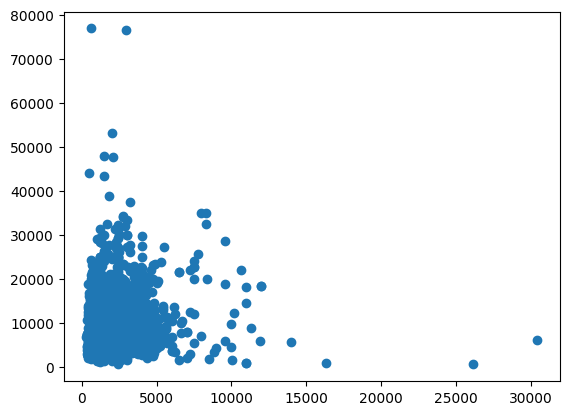

In [319]:
plt.scatter(x='total_sqft', y='Price_per_square_feet', data=df)

In [320]:
df.query('total_sqft > 20000')
# 7242, 12987, 6421, 7088

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
7242,Plot Area,Yelahanka,26136.0,1.0,0.0,150.0,1,573.921028
12987,Plot Area,other,30400.0,4.0,2.0,1824.0,6,6000.000000


In [321]:
df.query('Price_per_square_feet > 60000')


,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
6421,Plot Area,Bommenahalli,2940.0,3.0,2.0,2250.0,4,76530.612245
7088,Built-up Area,other,650.0,1.0,3.0,500.0,1,76923.076923


In [322]:
values = [7242, 12987, 6421, 7088]
df = df[df.index.isin(values) == False]

In [323]:
df.shape

(12004, 8)

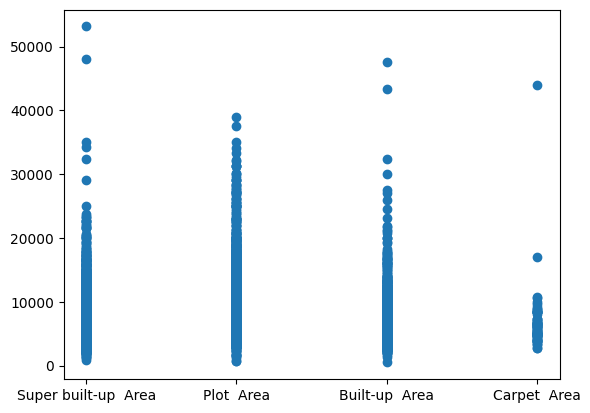

In [324]:
plt.scatter(x='area_type', y='Price_per_square_feet', data=df)

In [325]:
df.query('Price_per_square_feet > 40000')
# 13305, 7883, 9195, 9737, 5365	

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
5365,Built-up Area,Banashankari Stage II,1500.0,2.0,0.0,650.0,4,43333.333333
7883,Super built-up Area,other,2000.0,3.0,2.0,1063.0,4,53150.000000
9195,Super built-up Area,Whitefield,1496.0,2.0,1.0,718.0,3,47994.652406
9737,Built-up Area,other,2100.0,3.0,1.0,1000.0,4,47619.047619
13305,Carpet Area,Hulimavu,500.0,1.0,3.0,220.0,1,44000.000000


In [326]:
values = [13305, 7883, 9195, 9737, 5365]
df = df[df.index.isin(values) == False]

In [327]:
df.shape

(11999, 8)

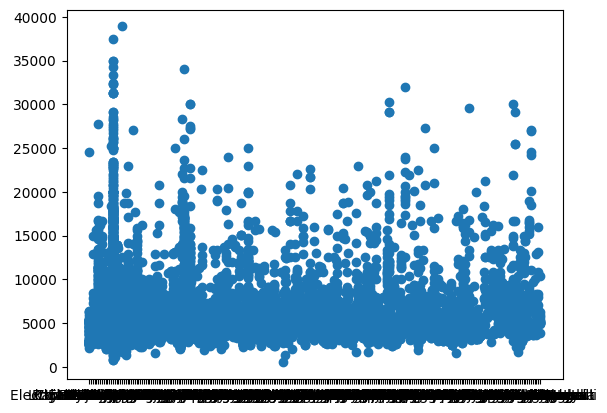

In [328]:
plt.scatter(x='location', y='Price_per_square_feet', data=df)

In [329]:
dummies = pd.get_dummies(df.location, dtype=int)
dummies.head(24)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
df.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 11999, dtype: object

In [331]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Marathahalli',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'other', 'Kengeri',
       'Binny Pete', 'Thanisandra', 'Bellandur', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - Attibele Road',
       'Yeshwanthpur', 'Chandapura', 'Nagarbhavi', 'Rajaji Nagar',
       'Devanahalli', 'Ramamurthy Nagar', 'Ma

In [332]:
df['location'].value_counts()

location
other                   2355
Whitefield               511
Sarjapur  Road           370
Electronic City          292
Kanakpura Road           257
                        ... 
Nagasandra                 8
Thyagaraja Nagar           7
Vishwapriya Layout         7
Vishveshwarya Layout       6
Marsur                     5
Name: count, Length: 248, dtype: int64

In [333]:
df2 = pd.concat([df, dummies.drop('Marsur', axis='columns')], axis='columns')

In [334]:
df2.head(5)

,area_type,location,total_sqft,bath,balcony,price,bhk,Price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
df3 = df2.drop('location', axis='columns')
df3.head()

,area_type,total_sqft,bath,balcony,price,bhk,Price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


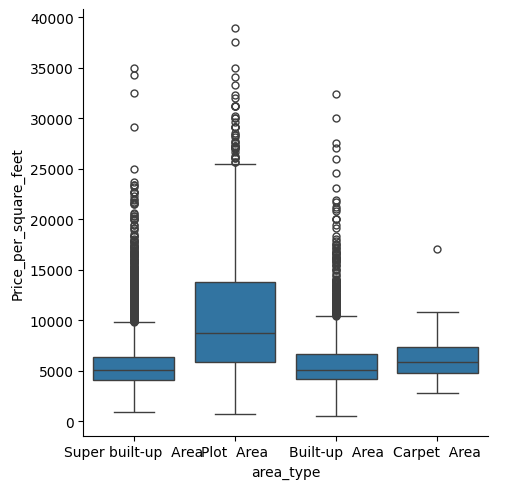

In [336]:
sns.catplot(data=df, x="area_type", y="Price_per_square_feet", kind="box")

In [337]:
area_type_dummies = pd.get_dummies(df.area_type, dtype=int)
area_type_dummies.head(24)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
8,0,0,0,1
10,0,0,0,1
11,0,0,1,0
12,0,0,0,1


In [338]:
print(area_type_dummies.columns)

Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')


In [339]:
df4 = pd.concat([df3, area_type_dummies.drop('Carpet  Area', axis='columns')], axis='columns')

In [340]:
df4.head()

,area_type,total_sqft,bath,balcony,price,bhk,Price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Plot Area,Super built-up Area
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Built-up Area,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [341]:
df5 = df4.drop('area_type', axis='columns')

In [342]:
df5.head()

,total_sqft,bath,balcony,price,bhk,Price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [343]:
df5.shape

(11999, 256)

In [344]:
X = df5.drop(['price'], axis='columns')
X.head(4)

,total_sqft,bath,balcony,bhk,Price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1440.0,2.0,3.0,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1521.0,3.0,1.0,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [345]:
y = df5.price
y.head(4)

0     39.07
1    120.00
2     62.00
3     95.00
Name: price, dtype: float64

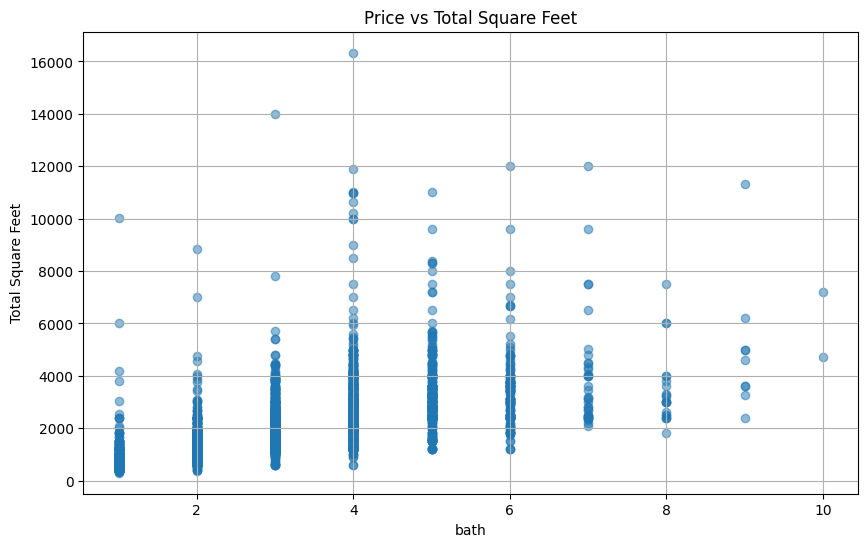

In [346]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['total_sqft'], alpha=0.5)
plt.title('Price vs Total Square Feet')
plt.xlabel('bath')
plt.ylabel('Total Square Feet')
plt.grid(True)

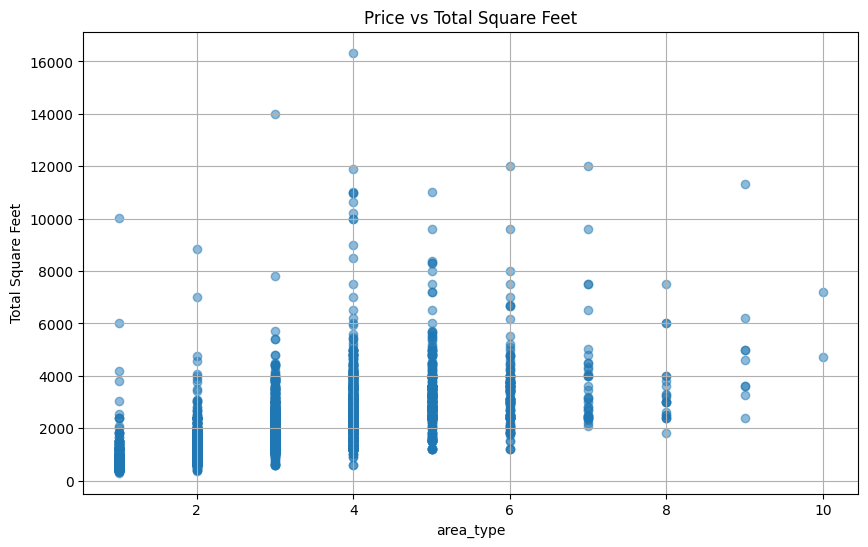

In [347]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['total_sqft'], alpha=0.5)
plt.title('Price vs Total Square Feet')
plt.xlabel('area_type')
plt.ylabel('Total Square Feet')
plt.grid(True)

MODEL TRAINING

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [350]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8805059339925172

In [351]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.854667  , 0.8305547 , 0.90372002, 0.8643138 , 0.83873743])